<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

This tutorial explores the perceptron and its associated learning algorithms (the Perceptron Learning Algorithm & the Pocket Algorithm). The perceptron as a concept is relatively simple and is thus not often used on its own as a method in modern machine learning. However it serves as an important building block for more capable machine learning models, such as neural networks which have led to the advanced field of deep learning. 




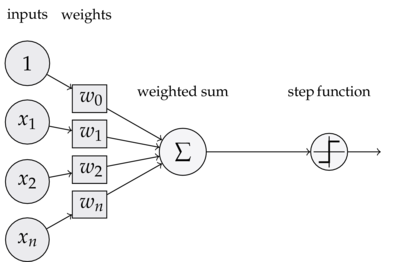


The perceptron (illustrated in the figure above) is a binary classifier which takes as input a vector, $\mathbf{x} = [x_1, x_2, \dotsc, x_n]^T$, and outputs a binary prediction $y \in \{-1, +1\}$. It does this by first producing a scalar value by multiplying each element in the input vector with a learned weight of the perceptron, $\mathbf{w} = [w_1, w_2, \dotsc, w_n]^T$ and then summing all the resulting elements together. This operation can be expressed as a vector dot product $\mathbf{w}^T \mathbf{x}$. The perceptron then checks if this scalar value $\mathbf{w}^T \mathbf{x}$ is greater or smaller than a threshold $t$. If the value is greater than the threshold then the perceptron predicts $y = +1$ otherwise it predicts $y = -1$. This can be expressed as a linear predictor where

$y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge t \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} \lt t
      \end{cases}
$

This formulation is inconvenient as it includes an extra parameter that is not part of the model. A common trick is to include it as a so called bias. We prepend $x_0 = 1$ to the input $\mathbf{x}$ such that $\mathbf{x} = [x_0, x_1, x_2, \dotsc, x_n]^T$ and $\mathbf{w} = [w_0, w_1, w_2, \dotsc, w_n]^T$. The weight $w_0$ will now represent the threshold (more precisely $w_0 = -t$) as $\mathbf{w}^T \mathbf{x} = \sum_{i=1}^n w_i x_i + w_0 x_0$ where $x_0 = 1$. 

With the bias, the linear predictor turns into

$y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge 0 \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} \lt 0
      \end{cases} = sign(\mathbf{w}^T \mathbf{x})
$

This is the mathematical formulation of the perceptron. However, this does not discuss how the weights $\mathbf{w}$ are learned. For this we need to go into the learning algorithms that are associated with the perceptron. To get a better understanding of these algorithms, this tutorial will show the python (currently the most commonly used language in machine learning) code needed to run these algorithms together with visualisations that provides more clarification.

We first install the necessary dependencies for the visualisations used later in the notebook.

In [ ]:
# Dependencies for plotting
!pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
from matplotlib import pyplot as plt

To train our perceptron, we need data which is used by the learning algorithms. For this tutorial we generate artificial data but for real applications this data can come from for example sensor readings. To put it into perspective, a simple real example can be data of petal lengths and petal widths, and then label  +1 can indicate that the flower is Species 1 and  labels -1 that the flower is Species 2. 

In [ ]:
def create_data():
  # Create the made-up data. Remember that the first column is x_0 = 1, i.e. the bias
  data = [[1, 2.7810836, 2.550537003],
    [1, 1.465489372, 2.362125076],
    [1, 3.396561688, 4.400293529],
    [1, 1.38807019, 1.850220317],
    [1, 3.06407232, 3.005305973],
    [1, 7.627531214, 2.759262235],
    [1, 5.332441248, 2.088626775],
    [1, 6.922596716, 1.77106367],
    [1, 8.675418651, -0.242068655],
    [1, 7.673756466, 3.508563011]]

  # For each entry in the toy data, we have a corresponding label.
  labels = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

  return data, labels

# Perceptron Learning Algorithm (PLA)
Having prepared our data, we are now ready to take a look at our first learning algorithm - the Perceptron Learning Algorithm (PLA). The PLA is an iterative algorithm which iterates over each data points from the dataset.

Initial weights of the perceptron can be set to a vector of zeros, i.e. $\mathbf{w} = \mathbf{0}$. PLA then takes each data point $x_i$ and classifies it using the current perceptron weights as either $+1$ or $-1$ using $sign(\mathbf{w}^T \mathbf{x})$. If the classification is incorrect such that the predicted value does not match the corresponding label, i.e. $sign(\mathbf{w}^T \mathbf{x}) \ne y_i$ then we stop iterating through the dataset and we update the learned weights of our perceptron.

The perceptron update rule is given as $\mathbf{w} \leftarrow \mathbf{w} + y_i x_i$. Note that the update is done only if the predicted label is incorrect and the weights are updated in the opposite direction to the prediction i.e., the predicted label was $+1$ while the true one was $-1$ and vice versa. In this way the error should decrease in the next iteration. After the update of the  weights, we go back to the first data point and start iterating through the points again. If the dataset is separable i.e. all data points can be classified correctly, then the algorithm will eventually iterate through all the  data points without any misclassification.

Below we define one iteration of our Perceptron Learning Algorithm.

In [ ]:
def pla_iteration(curr_weights, dataset, labels):
  """
  Inputs:
    curr_weight: current weights of the perceptron
    data: the dataset to iterate through with PLA
    labels: ground truth labels of the dataset
  Output:
    (updated_weights, finished): tuple of the new weights and a boolean
                                 indicating if the predictor separates the data
                                 (in the case of separable data)
  """


  # Iterate through the data and the corresponding label
  for (data_point, label) in zip(dataset, labels):
    activation = (curr_weights[0] * data_point[0] + curr_weights[1] * data_point[1] 
                  + curr_weights[2] * data_point[2])

    # sign function
    prediction = 1 if activation > 0 else -1

    # compare prediction with ground truth label
    if prediction != label:
      updated_weights = [curr_weights[0] + label * data_point[0], 
                         curr_weights[1] + label * data_point[1],
                         curr_weights[2] + label * data_point[2]]
      return (updated_weights, False)
  
  # No misclassified point was found, PLA has finished
  return (curr_weights, True)

We are now ready to train our first perceptron. We first initialise the perceptron weights (in this case arbitrarily chosen to be all zeros) and then we run the PLA on our previously defined data.

In [ ]:
finished_pla = False
iteration_counter = 0

weights = [0, 0, 2] # Initalise weights to some arbitrary numbers 
saved_weights = []  # Save all weights for future plotting
toy_data, toy_labels = create_data()

while not finished_pla:
  print(f"Iteration {iteration_counter}, weights: {weights}")
  saved_weights.append(weights)
  weights, finished_pla = pla_iteration(weights, toy_data, toy_labels)
  iteration_counter += 1

print(f"The classifier has converged after {iteration_counter - 1} iterations. Weights: {weights}")

Iteration 0, weights: [0, 0, 2]
Iteration 1, weights: [-1, -2.7810836, -0.5505370030000001]
Iteration 2, weights: [0, 4.846447614000001, 2.208725232]
Iteration 3, weights: [-1, 2.0653640140000005, -0.34181177100000015]
Iteration 4, weights: [-2, -0.7157195859999996, -2.8923487740000002]
Iteration 5, weights: [-1, 6.911811628000001, -0.13308653900000023]
Iteration 6, weights: [-2, 4.130728028, -2.6836235420000003]
Iteration 7, weights: [-3, 1.349644428, -5.234160545]
Iteration 8, weights: [-2, 8.977175642, -2.47489831]
Iteration 9, weights: [-3, 6.196092042, -5.025435313]
Iteration 10, weights: [-4, 3.415008442, -7.575972316]
Iteration 11, weights: [-3, 8.74744969, -5.487345541]
Iteration 12, weights: [-4, 5.966366089999999, -8.037882544]
The classifier has converged after 12 iterations. Weights: [-4, 5.966366089999999, -8.037882544]


We now use matplotlib (a common library for visualisation in Python) to visualise the decision boundary from the weights of the perceptron learning algorithm at each iteration. 

Make sure you have run all the necessary code (for example by going to "Runtime" $\rightarrow$ "Run all"). After running the code, you can use the slider in the figure to see at iteration.

In [ ]:
def plot_classifier(data, labels, w0, w1, w2, set_axis_to_data=False):
    first_dim = list(map(lambda x: x[1], data))
    second_dim = list(map(lambda x: x[2], data))
    colors = ['red' if label == 1 else 'blue' for label in labels]

    # Plot Data
    plt.scatter(first_dim, second_dim, c=colors)

    x1, x2 = min(first_dim) - 10, max(first_dim) + 10  # Choose two arbitrary point for plotting the classifier
    y1, y2 = (-w1 * x1 - w0) / (w2 + 1e-8), (-w1 * x2 - w0) / (w2 + 1e-8)  # 1e-8 for avoiding division with zero, i.e. numerical stability

    # Plot Classifier
    plt.plot([x1, x2], [y1, y2])
    
    # Scale Axis
    if set_axis_to_data:
      x_margin = (max(first_dim) - min(first_dim)) * 0.1
      y_margin = (max(second_dim) - min(second_dim)) * 0.1
      plt.xlim(min(first_dim) - x_margin, max(first_dim) + x_margin)
      plt.ylim(min(second_dim) - y_margin, max(second_dim) + y_margin)
    else:
      plt.xlim(-2, 12)
      plt.ylim(-4, 9)

@interact
def plot_weights(iteration=(0, iteration_counter - 1)):
    # Plot decision boundary, i.e. solve for w0 * 1 + w1 * x + w2 * y = 0
    w0, w1, w2 = saved_weights[iteration][0], saved_weights[iteration][1], saved_weights[iteration][2]

    plot_classifier(toy_data, toy_labels, w0, w1, w2)

interactive(children=(IntSlider(value=6, description='iteration', max=12), Output()), _dom_classes=('widget-in…

An important point to make here is that the data is 3 dimensional (2 data values + one label), and there are three weight values (including bias) that make the separating classifier a plane and not a line. The plotted decision boundary is 2 dimensional only because we display the intersection line $\mathbf{w}^T \mathbf{x} = 0$ with 2D data plot and label in colour rather than in 3rd dimension. This line that shows the boundary that predicts +1 on one side and -1 on the other. Note that the data points have fixed values in the plot but the axes are automatically rescaled to show the line corresponding to current weights $\mathbf{w}$.

The code below plots the data and the perceptron classifier in 3 dimensions. Observe that the data is either +1 or -1 on the z-axis. The previous 2D plot shows the same as what the 3D plot shows if viewed from the top when the x-axis and y-axis are correctly aligned.

Once again make sure that you run all the code. When you have, you can use the slider in the figure to see the learned perceptron at each iteration.

In [ ]:
import plotly.graph_objects as go

# Example showing a 3d plot with z regressed over x and y, plus gaussian noise in the label
@interact
def plot_weights_3d(iteration=(0, iteration_counter - 1)):
    # Data
    first_dim = list(map(lambda x: x[1], toy_data))
    second_dim = list(map(lambda x: x[2], toy_data))

    # For Plotting the Classifier
    xx, yy = np.meshgrid([-2, 12], [-4, 9])  # Arbitrary points to plot the classifier from
    colors = ['red' if label == 1 else 'blue' for label in toy_labels]

    # Classifier Definition
    w0, w1, w2 = saved_weights[iteration][0], saved_weights[iteration][1], saved_weights[iteration][2]
    classifier = -w1 * xx - w2 * yy

    # Plot Classifier
    fig = go.Figure(data=[go.Surface(z=classifier, x=xx, y=yy)])

    # Plot Data
    fig.add_scatter3d(x=first_dim, y=second_dim, z=toy_labels,
              mode='markers',
              marker=dict(
                size=5,
                color=colors,
                opacity=0.8
            ))
    
    # Scale Axis
    fig.update_layout(
    scene = dict(
        xaxis = dict(range=[-2, 12],),
        yaxis = dict(range=[-4, 9],),
        zaxis = dict(range=[-3, 3],),),
    )

    fig.show()


interactive(children=(IntSlider(value=6, description='iteration', max=12), Output()), _dom_classes=('widget-in…

# Pocket Learning Algorithm
We have so far only considered separable data, but if the dataset is non-separable then the Perceptron Learning Algorithm will never finish the iterations.

To solve the problem of the Perceptron Learning Algorithm not converging on non-separable data we can use what is called the Pocket Algorithm which is a simple extension of the Perceptron Learning Algorithm. We restrict the number of iterations which we run the Perceptron Learning Algorithm (we simply stop iterating through the dataset when we have reached that number of iterations), and we keep track of the number of misclassifications at each iteration as well as the weights at that iteration. 

The Pocket Algorithm simply returns the weights of the learned Perceptron that achieves the least number of misclassifications.

Below we define the pocket algorithm in code.

In [ ]:
def pocket_algorithm(iterations, dataset, labels):
    curr_weights = best_weights = [0, 0, 0]  # Feel free to change the initialisation of the weights!
    min_misclassifications = float('inf')

    for i in range(iterations):
        curr_weights, finished_pla = pla_iteration(curr_weights, dataset, labels)

        # If the data is actually separable, then return as normal
        if finished_pla:
          print(f"Pocket Algorithm Converged After {i+1} Iterations")
          return curr_weights, 0

        # Evaluate the new weights:
        misclassifications = 0
        for (data_point, label) in zip(dataset, labels):
          activation = (curr_weights[0] * data_point[0] + curr_weights[1] * data_point[1]
                        + curr_weights[2] * data_point[2])

          # sign function
          prediction = 1 if activation > 0 else -1

          # compare prediction with ground truth label
          if prediction != label:
              misclassifications += 1

        if misclassifications < min_misclassifications:
            best_weights = curr_weights
            min_misclassifications = misclassifications

    return best_weights, min_misclassifications

# Coursework

## Task 1: Perceptron Learning Algorithm
As an introduction to writing your own code, you are tasked to run the Perceptron Learning Algorithm on your own. Run the Perceptron Learning Algorithm on the following data:


| x    | y    | label |
|------|------|-------|
| -0.5 | -9   | 1     |
| -0.5 | 9.1  | 1     |
| 0.2  | 10.2 | 1     |
| 1.9  | 7.5  | 1     |
| 4.2  | 4.1  | 1     |
| 2.1  | -7.3 | -1    |
| 5.9  | -3.3 | -1    |
| 7.6  | 4.5  | -1    |
| 8.3  | 5.7  | -1    |
| 9.9  | 7.1  | -1    |
| 10.1 | 10.6 | -1    |

You may want to use previously defined functions, or you can create your own functions as well.

**Report**:
* By running the Perceptron Learning Algorithm on the above data, report the weights of the found linear classifier. Also specify the weights that the perceptron was initialised with.




In [ ]:
# Task 1
# Write your code here

## Task 2: Pocket Algorithm
For the second task you are already provided with the code. Your task is to simply try out the Pocket Algorithm with different configurations. 

**Report**:
By changing the noise variance and the number of iterations in the Pocket Algorithm and running the code multiple times for each configuration. Answer the following questions:

* What is the effect of the variance of the gaussian noise added to the data?
  * What happens when the noise variance is zero? Make sure that the pocket algorithm runs is set to run for at least 10 iterations.
  * Consider how the noise variance affects both the separability / non-separability of the dataset and how it affects the number of misclassifications.

* What is the effect of the number of iterations of the Pocket Algorithm? Consider how it relates to the number of misclassifications and how it is affected by the variance of the added gaussian noise?

As a starting point, good values to consider are noise variances from 0 to 5, and number of iterations from 1 to 100000.

In [ ]:
# -------------------------- CHANGE THESE -------------------------- #
noise_variance = 0
pocket_algorithm_iterations = 1000
# ------------------------------------------------------------------ #

import random

def create_task2_data(noise_variance=0):
  # Create the data. Remember that the first column is x_0 = 1, i.e. the bias
  data = [[1, 5.1, 3.5], [1, 4.9, 3.0], [1, 4.7, 3.2], [1, 4.6, 3.1],
          [1, 5.0, 3.6], [1, 5.4, 3.9], [1, 4.6, 3.4], [1, 5.0, 3.4],
          [1, 4.4, 2.9], [1, 4.9, 3.1], [1, 5.4, 3.7], [1, 4.8, 3.4],
          [1, 4.3, 3.0], [1, 5.8, 4.0], [1, 5.7, 4.4], [1, 5.4, 3.9],
          [1, 5.1, 3.5], [1, 5.7, 3.8], [1, 5.1, 3.8], [1, 5.4, 3.4],
          [1, 6.3, 3.3], [1, 5.8, 2.7], [1, 7.1, 3.0], [1, 6.3, 2.9],
          [1, 6.5, 3.0], [1, 7.6, 3.0], [1, 4.9, 2.5], [1, 7.3, 2.9],
          [1, 6.7, 2.5], [1, 7.2, 3.6], [1, 6.5, 3.2], [1, 6.4, 2.7],
          [1, 6.8, 3.0], [1, 5.7, 2.5], [1, 5.8, 2.8], [1, 6.4, 3.2],
          [1, 6.5, 3.0], [1, 7.7, 3.8], [1, 7.7, 2.6], [1, 6.0, 2.2]]

  # For each entry in the data, we have a corresponding label.
  labels = [-1] * 20 + [1] * 20
  
  # Add some noise
  for row_idx in range(len(data)):
    data[row_idx][1] += random.gauss(0, noise_variance ** 0.5)
    data[row_idx][2] += random.gauss(0, noise_variance ** 0.5)

  return data, labels


# We do multiple runs to reduce randomness
total_trials = 10
total_misclassifications = 0
for i in range(total_runs):
  new_data, new_labels = create_task2_data(noise_variance=noise_variance)
  best_weights, misclassifications = pocket_algorithm(pocket_algorithm_iterations, new_data, new_labels)
  total_misclassifications += misclassifications
  print(f"Trial {i+1}: number of misclassifications {misclassifications}")

print(f"Mean number of misclassifications: {total_misclassifications / total_trials} \n")

print("Visualising the last trial")
plot_classifier(new_data, new_labels, best_weights[0], best_weights[1], best_weights[2], set_axis_to_data=True)